In [1]:
import Pkg

Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")

   Updating registry at `C:\Users\yancf\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [17]:
using CSV
using DataFrames
using Plots
using StatsPlots

In [18]:
df = Array{DataFrame}(undef,3)
df[1] = DataFrames.DataFrame(CSV.File("./src/data/mergesort/Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz.csv"))
df[2] = DataFrames.DataFrame(CSV.File("./src/data/mergesort/AMD FX(tm)-8350 Eight-Core Processor.csv"))
df[3] = DataFrames.DataFrame(CSV.File("./src/data/mergesort/Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz.csv"))

,Length,Elapsed Time,L1 Cache miss,L2 Cache miss,L3 Cache miss,Num of instructions
,Int64,Float64,Int64,Int64,Int64,Int64
1,2048,1.318,1374,1849,227,8976910
2,2176,1.59,1462,1772,64,9651470
3,2304,1.313,1706,2036,16,10315841
4,2432,1.21,1668,2009,17,10980495
5,2560,1.287,1867,2165,10,11637828
6,2688,1.359,2039,2274,27,12302488
7,2816,1.421,2114,2425,30,12959960
8,2944,1.497,2210,2345,20,13617580
9,3072,1.64,2694,2637,22,14267956


In [19]:
function GenericPlot(dfs::Array{DataFrame}, xlabel::String, ylabel::String, label::Array{String})
    p = plot(dfs[1][!, xlabel], dfs[1][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[1]) 

    for i = 2:length(dfs)
        plot!(dfs[i][!, xlabel], dfs[i][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[i])
    end

    p
end

GenericPlot (generic function with 1 method)

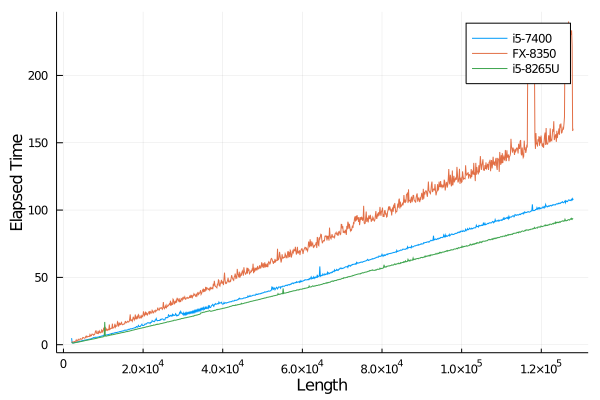

In [24]:
GenericPlot(df, "Length", "Elapsed Time", ["i5-7400", "FX-8350", "i5-8265U"])

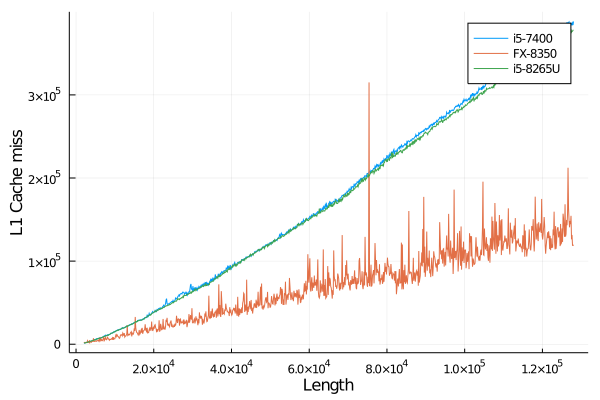

In [25]:
GenericPlot(df, "Length", "L1 Cache miss", ["i5-7400", "FX-8350", "i5-8265U"])

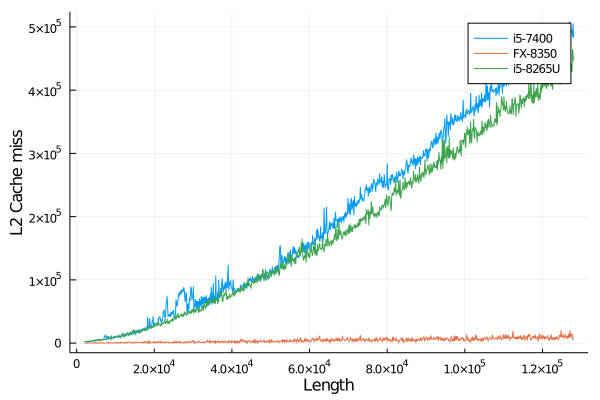

In [26]:
GenericPlot(df, "Length", "L2 Cache miss", ["i5-7400", "FX-8350", "i5-8265U"])

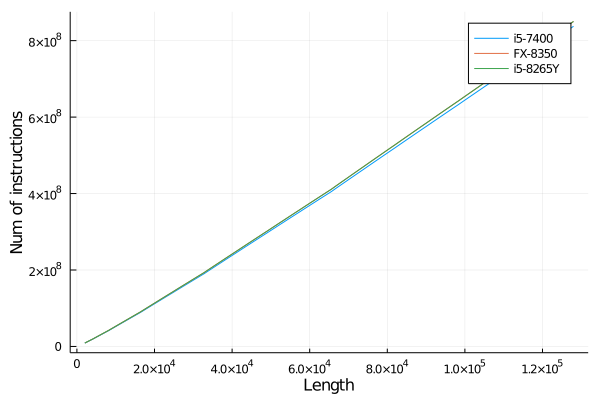

In [23]:
GenericPlot(df, "Length", "Num of instructions", ["i5-7400", "FX-8350", "i5-8265U"])